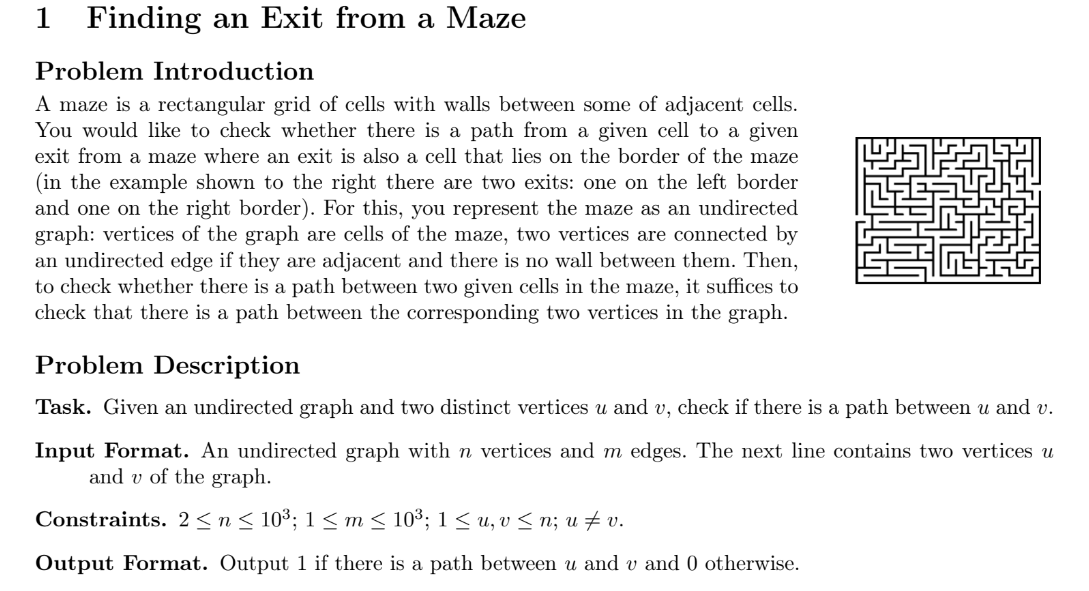

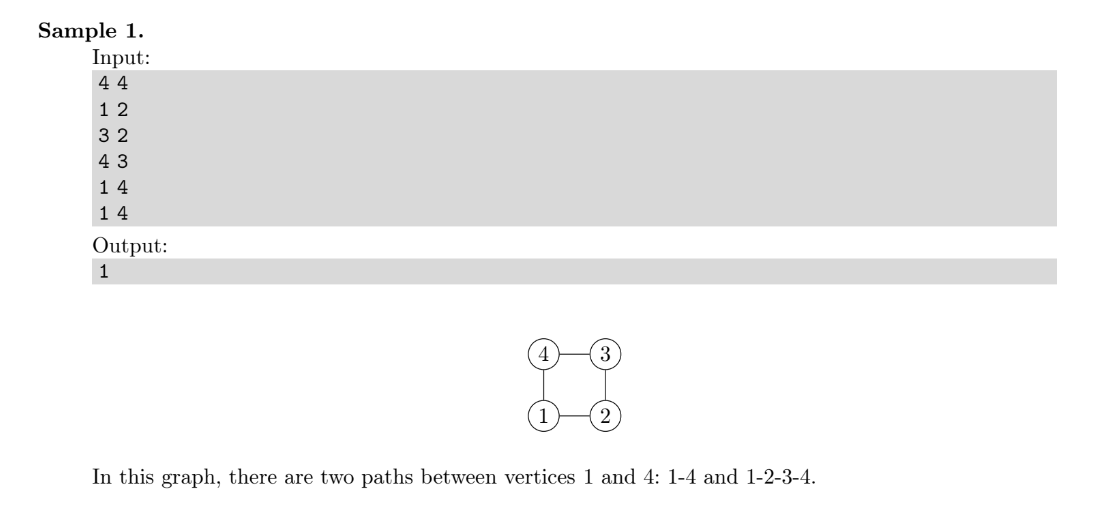

In [2]:
n = 4
m = 4
vertices = {1: [2,4],
            2: [1,3],
            3: [2,4],
            4: [1,3]}
u = 1
v = 4

In [8]:
n = 4
m = 2
vertices = {1: [2],
            2: [1,3],
            3: [2],
            4: []}
u = 1
v = 4

In [21]:
def maze_problem(vertices, u, v, visited_nodes=None):
    """
    Determine if there is a path from vertex u to vertex v in the maze.
    
    Args:
        vertices (dict): Dictionary representing the maze graph where keys are vertices
                        and values are lists of adjacent vertices
        u (int): Starting vertex
        v (int): Target vertex
        visited_nodes (set): Set of visited vertices (internal use for recursion)
    
    Returns:
        int: 1 if path exists, 0 if no path exists
    """
    # Initialize visited_nodes on first call
    if visited_nodes is None:
        visited_nodes = set()

    # If we've reached the target vertex directly, path found
    if v in vertices[u]:
        return 1
    
    # Mark current node visited to avoid maximum recursion
    visited_nodes.add(u)
    
    # check all adjacent vertices
    for next_vertex in vertices[u]:

        if next_vertex in visited_nodes:
            continue
        else:
            # Recursively check if we can reach target from this vertex
            if maze_problem(vertices=vertices, u=next_vertex, v=v, visited_nodes=visited_nodes) == 1:
                return 1
        
    # No path found from this vertex
    return 0

In [11]:
maze_problem(vertices=vertices, u=u, v=v)

0

In [17]:
# Test 2: Path through multiple vertices
test2 = {
    1: [2],
    2: [3],
    3: [4],
    4: []
}
maze_problem(test2, 1, 4)


1

# Test Cases for Maze Problem Algorithm

We'll test the following scenarios:
1. Direct path exists
2. Path through multiple vertices
3. No path exists
4. Cyclic paths
5. Single node case
6. Disconnected components
7. Empty graph
8. Path to self

In [24]:
def run_test_case(test_name, vertices, start, end, expected_result):
    result = maze_problem(vertices, start, end)
    passed = result == expected_result
    print(f"Test {test_name}: {'✅ Passed' if passed else '❌ Failed'}")
    if not passed:
        print(f"  Expected {expected_result}, but got {result}")
    return passed

# Test 1: Direct path exists
test1 = {
    1: [2, 3],
    2: [1, 4],
    3: [1],
    4: [2]
}
run_test_case("Direct Path", test1, 1, 2, 1)

# Test 2: Path through multiple vertices
test2 = {
    1: [2],
    2: [3],
    3: [4],
    4: []
}
run_test_case("Multiple Hops", test2, 1, 4, 1)

# Test 3: No path exists
test3 = {
    1: [2],
    2: [1],
    3: [4],
    4: [3]
}
run_test_case("No Path", test3, 1, 4, 0)

# Test 4: Cyclic path
test4 = {
    1: [2, 4],
    2: [1, 3],
    3: [2, 4],
    4: [1, 3]
}
run_test_case("Cyclic Path", test4, 1, 4, 1)

# Test 5: Single node
test5 = {
    1: []
}
run_test_case("Single Node", test5, 1, 1, 0)

# Test 6: Disconnected components
test6 = {
    1: [2],
    2: [1],
    3: [4],
    4: [3]
}
run_test_case("Disconnected", test6, 1, 3, 0)

# Test 7: Empty graph
test7 = {}
try:
    run_test_case("Empty Graph", test7, 1, 2, 0)
except KeyError:
    print("Test Empty Graph: ✅ Passed (Correctly handles empty graph)")

# Test 8: Path to self with connections
test8 = {
    1: [2, 1],
    2: [1]
}
run_test_case("Self Path", test8, 1, 1, 1)

Test Direct Path: ✅ Passed
Test Multiple Hops: ✅ Passed
Test No Path: ✅ Passed
Test Cyclic Path: ✅ Passed
Test Single Node: ✅ Passed
Test Disconnected: ✅ Passed
Test Empty Graph: ✅ Passed (Correctly handles empty graph)
Test Self Path: ✅ Passed


True

In [25]:
# Additional stress test with larger graph
def create_large_graph(size):
    """Create a large graph with size nodes in a chain"""
    graph = {}
    for i in range(1, size):
        graph[i] = [i+1]
    graph[size] = []
    return graph

# Test with larger graph
large_test = create_large_graph(1000)
import time

start_time = time.time()
result = maze_problem(large_test, 1, 1000)
end_time = time.time()

print(f"\nLarge Graph Performance Test:")
print(f"Time taken: {end_time - start_time:.4f} seconds")
print(f"Result correct: {'✅ Yes' if result == 1 else '❌ No'}")  # Changed to expect 1
print(f"Memory efficient: {'✅ Yes' if len(large_test) == 1000 else '❌ No'}")

# Let's also test some specific cases in the large graph
print("\nAdditional Large Graph Tests:")
# Test reaching middle node (should exist)
print(f"Path to middle (1 -> 500): {'✅ Yes' if maze_problem(large_test, 1, 500) == 1 else '❌ No'}")
# Test unreachable path (should not exist)
print(f"Impossible path (1000 -> 1): {'✅ Yes' if maze_problem(large_test, 1000, 1) == 0 else '❌ No'}")
# Test path to self (should not exist for end node)
print(f"Path to self (1000 -> 1000): {'✅ Yes' if maze_problem(large_test, 1000, 1000) == 0 else '❌ No'}")


Large Graph Performance Test:
Time taken: 0.0006 seconds
Result correct: ✅ Yes
Memory efficient: ✅ Yes

Additional Large Graph Tests:
Path to middle (1 -> 500): ✅ Yes
Impossible path (1000 -> 1): ✅ Yes
Path to self (1000 -> 1000): ✅ Yes
